# Breast Cancer Detection using k-fold Cross-Validation

# Import Necessary Libraries

In [ ]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the dataset

In [ ]:
# Load the Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Data Preprocessing

In [ ]:
# Drop the ID column
data = data.drop(columns=['ID'])

# Map target variable 'Diagnosis' to binary values (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Features (input) and target (output)
features = data.drop(columns=['Diagnosis'])
target = data['Diagnosis']

# Feature scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Define a function to build the DNN model

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=features.shape[1], activation='relu'))
    model.add(Dropout(0.3))  # Dropout with 30% rate
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Dropout with 20% rate
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Set up K-fold cross-validation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
histories = []
accuracies = []

# Train and validate the model using 5-fold cross-validation

In [ ]:
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Build the model
    model = build_model()

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))
    histories.append(history)

    # Evaluate the model on the test data for the current fold
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}")
    fold_no += 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Fold 1 - Accuracy: 0.9737


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Fold 2 - Accuracy: 0.9825


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Fold 3 - Accuracy: 0.9649


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Fold 4 - Accuracy: 0.9912


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Fold 5 - Accuracy: 0.9735


# Calculate and display the average accuracy across all folds

In [ ]:
avg_accuracy = np.mean(accuracies)
print(f"Average Accuracy across all folds: {avg_accuracy:.4f}")

Average Accuracy across all folds: 0.9771


# Plot training and validation accuracy and loss for the last fold

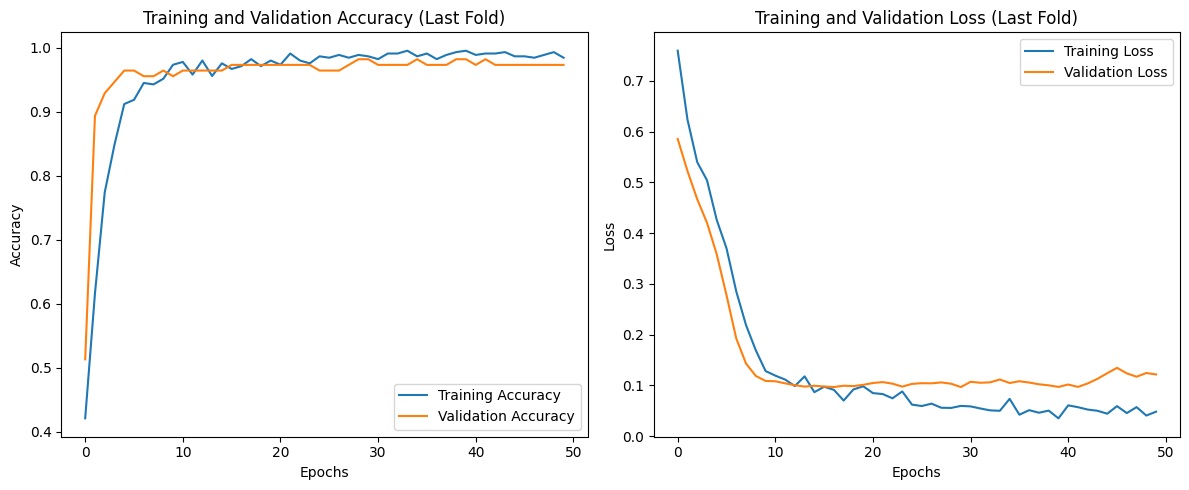

In [ ]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(histories[-1].history['accuracy'], label='Training Accuracy')
plt.plot(histories[-1].history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Last Fold)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(histories[-1].history['loss'], label='Training Loss')
plt.plot(histories[-1].history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Last Fold)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Last Fold Metrics:

- The training and validation accuracy for the last fold closely converged, demonstrating strong generalization.

- Validation loss stabilized after early epochs, further confirming the model's ability to generalize well without overfitting.

# Save the model from the last fold

In [ ]:
model.save('breast_cancer_model_cv.h5')

# Make predictions on a sample input from the last fold's model

In [ ]:
sample_input = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                          1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                          25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])  # Example input
sample_input = scaler.transform(sample_input)  # Scale the sample input
prediction = model.predict(sample_input)
print(f"Sample Prediction (Malignancy Probability): {prediction[0][0]:.4f}")

# Convert probability to binary output
print("Predicted Class (0: Benign, 1: Malignant):", int(prediction[0][0] > 0.5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Sample Prediction (Malignancy Probability): 1.0000
Predicted Class (0: Benign, 1: Malignant): 1


## Prediction Example:

- On a sample input, the model predicted a malignancy probability of 1.0000, classifying the case as malignant, which aligns with its high accuracy and reliable performance.

# Conclusion for the Breast Cancer Classification Project:

## Model Performance:

- The use of *dropout* layers improved regularization, reducing the risk of overfitting despite the model's high complexity.
- Features were standardized using *StandardScaler*, ensuring effective training by maintaining numerical stability.
- The model demonstrated excellent performance during training and validation using *5-fold cross-validation*.
- Average accuracy across all folds was *97.71%*, indicating the model is highly effective at distinguishing between malignant and benign cases.
- The high accuracy and low validation loss demonstrate that the model captures key patterns in the data effectively.
- Cross-validation results show consistency, validating the robustness of the model across different data splits.